# Vizualizacija nomograma

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import csv
import random
import math
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import FloatText
from IPython.display import clear_output

## Generiramo v naprej določeno učno množico iz vaj
* Tukaj generiramo učno množico, ki smo jo uporabljali na vajah in je prisotna kot primer za preverjanje ali algoritem deluje pravilno (kar seveda deluje) (upam da).

In [2]:
def generate_preset():
    data = [
        ["Rainy", "Hot", "High", False, "No"],
        ["Rainy", "Hot", "High", True, "No"],
        ["Overcast", "Hot", "High", False, "Yes"],
        ["Sunny", "Mild", "High", False, "Yes"],
        ["Sunny", "Cool", "Normal", False, "Yes"],
        ["Sunny", "Cool", "Normal", True, "No"],
        ["Overcast", "Cool", "Normal", True, "Yes"],
        ["Rainy", "Mild", "High", False, "No"],
        ["Rainy", "Cool", "Normal", False, "Yes"],
        ["Sunny", "Mild", "Normal", False, "Yes"],
        ["Rainy", "Mild", "Normal", True, "Yes"],
        ["Overcast", "Mild", "High", True, "Yes"],
        ["Overcast", "Hot", "Normal", False, "Yes"],
        ["Sunny", "Mild", "High", True, "No"],
    ]

    header = ["Outlook", "Temperature", "Humidity", "Windy", "PlayGolf"]

    with open("data.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(header)
        writer.writerows(data)

    data = pd.read_csv("data.csv", sep=",")

    return data


data = generate_preset()

## Generiramo naključno učno množico
* Funkcija za generacijo naključne učne množice, kjer kot argument **num_rows** podamo kako veliko učno množico želimo generirati.

In [3]:
def generate_random_csv(num_rows=20):
    header = ["Outlook", "Temperature", "Humidity", "Windy", "PlayGolf"]
    rows = []
    for _ in range(num_rows):
        row_data = [
            random.choice(["Sunny", "Overcast", "Rainy"]),  # Outlook
            random.choice(["Hot", "Cool", "Mild"]),  # Temperature
            random.choice(["High", "Normal"]),  # Humidity
            random.choice(["True", "False"]),  # Windy
            random.choice(["Yes", "No"]),  # PlayGolf
        ]
        rows.append(row_data)

    return header, rows


def write_csv_file(file_path, header, rows):
    with open(file_path, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(header)
        writer.writerows(rows)


def generate_random(num_rows=20):
    header, rows = generate_random_csv(num_rows)
    write_csv_file("ucna_mnozica.csv", header, rows)

    ucna_mnozica = pd.read_csv("ucna_mnozica.csv", sep=",")

    return ucna_mnozica


ucna_mnozica = generate_random()

## Tako izgleda naša naključno generirana množica

In [4]:
ucna_mnozica

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Cool,Normal,True,Yes
1,Rainy,Hot,Normal,True,No
2,Overcast,Hot,Normal,False,Yes
3,Rainy,Mild,Normal,True,Yes
4,Overcast,Mild,High,False,No
5,Sunny,Hot,High,False,No
6,Rainy,Hot,High,False,No
7,Sunny,Mild,High,True,Yes
8,Sunny,Cool,Normal,True,No
9,Overcast,Mild,Normal,False,No


## Funkcija za ovrednotenje učne množice
* Funkcija prešteje število posameznih vrednosti pri vseh spremeljivkah glede na rezultat ciljnega razreda.
* Vrne tabelo z številskimi vrednostmi pri posameznih cilnih vrednostih.
* Izgled vrnjene tabele je izpisan pod okvirjem s kodo.

In [5]:
def calculate_df(ucna_mnozica):
    dataframes = []

    playGolf_yes = ucna_mnozica[ucna_mnozica["PlayGolf"] == "Yes"]
    playGolf_no = ucna_mnozica[ucna_mnozica["PlayGolf"] == "No"]

    # Outlook
    outlook_df = pd.DataFrame(
        {
            "Outlook": ["Sunny", "Overcast", "Rainy"],
            "PlayGolf_Yes": [
                (playGolf_yes["Outlook"] == "Sunny").sum(),
                (playGolf_yes["Outlook"] == "Overcast").sum(),
                (playGolf_yes["Outlook"] == "Rainy").sum(),
            ],
            "PlayGolf_No": [
                (playGolf_no["Outlook"] == "Sunny").sum(),
                (playGolf_no["Outlook"] == "Overcast").sum(),
                (playGolf_no["Outlook"] == "Rainy").sum(),
            ],
        }
    )

    outlook_df["Total"] = outlook_df["PlayGolf_Yes"] + outlook_df["PlayGolf_No"]
    dataframes.append(("Outlook", outlook_df))

    # Temperature
    temperature_df = pd.DataFrame(
        {
            "Temperature": ["Hot", "Mild", "Cool"],
            "PlayGolf_Yes": [
                (playGolf_yes["Temperature"] == "Hot").sum(),
                (playGolf_yes["Temperature"] == "Mild").sum(),
                (playGolf_yes["Temperature"] == "Cool").sum(),
            ],
            "PlayGolf_No": [
                (playGolf_no["Temperature"] == "Hot").sum(),
                (playGolf_no["Temperature"] == "Mild").sum(),
                (playGolf_no["Temperature"] == "Cool").sum(),
            ],
        }
    )

    temperature_df["Total"] = (
        temperature_df["PlayGolf_Yes"] + temperature_df["PlayGolf_No"]
    )
    dataframes.append(("Temperature", temperature_df))

    # Humidity
    humidity_df = pd.DataFrame(
        {
            "Humidity": ["Normal", "High"],
            "PlayGolf_Yes": [
                (playGolf_yes["Humidity"] == "Normal").sum(),
                (playGolf_yes["Humidity"] == "High").sum(),
            ],
            "PlayGolf_No": [
                (playGolf_no["Humidity"] == "Normal").sum(),
                (playGolf_no["Humidity"] == "High").sum(),
            ],
        }
    )

    humidity_df["Total"] = humidity_df["PlayGolf_Yes"] + humidity_df["PlayGolf_No"]
    dataframes.append(("Humidity", humidity_df))

    # Windy
    windy_df = pd.DataFrame(
        {
            "Windy": ["True", "False"],
            "PlayGolf_Yes": [
                (playGolf_yes["Windy"] == True).sum(),
                (playGolf_yes["Windy"] == False).sum(),
            ],
            "PlayGolf_No": [
                (playGolf_no["Windy"] == True).sum(),
                (playGolf_no["Windy"] == False).sum(),
            ],
        }
    )

    windy_df["Total"] = windy_df["PlayGolf_Yes"] + windy_df["PlayGolf_No"]
    dataframes.append(("Windy", windy_df))

    return dataframes, (len(playGolf_yes), len(playGolf_no))


dataframes, aprior = calculate_df(data)
for df in dataframes:
    print(df[1])
    print()

    Outlook  PlayGolf_Yes  PlayGolf_No  Total
0     Sunny             3            2      5
1  Overcast             4            0      4
2     Rainy             2            3      5

  Temperature  PlayGolf_Yes  PlayGolf_No  Total
0         Hot             2            2      4
1        Mild             4            2      6
2        Cool             3            1      4

  Humidity  PlayGolf_Yes  PlayGolf_No  Total
0   Normal             6            1      7
1     High             3            4      7

   Windy  PlayGolf_Yes  PlayGolf_No  Total
0   True             3            3      6
1  False             6            2      8



## Funkcija za izračun nomograma
* Funkcija izračuna vrednosti točk za posamezne spremenljivke v učni množici
* skupno število točk za verjetnost celotnega primera:
$$
točke(C|X_1 X_2...X_n) = \sum_{i} log OR(X_i) = \sum_{i} log \frac{P(X_i|C)}{P(X_i|{\overline C})}
$$
* Vsi zgoraj navedeni logaritmi so **naravni**.
* Kako izračunati izraz znotraj logaritma $OR(X_i)$? Po **Bayesovem pravilu** velja:
$$
\frac{P(X_i|C)}{P(X_i|{\overline C})} = \frac{\frac{P(C|X_i) \cdot P(X_i)}{P(C)}}{\frac{P({\overline C}|X_i) \cdot P(X_i)}{P({\overline C})}} = \frac{\frac{P(C|X_i)}{P(C)}}{\frac{P({\overline C}|X_i)}{P({\overline C})}} = \frac{\frac{P(C|X_i)}{P({\overline C}|X_i)}}{\frac{P(C)}{P({\overline C})}}
$$
* Ko racunamo posamzne verjentosti $P(X_i|C)$ se lahko zgodi, da ni nobenega primera za te pogoje, kar nas lahko pripelje do **deljenja z 0**, zato se pri računanju uporabi **Laplacova ocena**.

In [6]:
def calculate_points(df, yes=True):
    variable, df = df
    p_yes = df["PlayGolf_Yes"].sum()
    p_no = df["PlayGolf_No"].sum()
    return_values = []
    for i in range(df.shape[0]):
        if yes:
            value = math.log(
                ((df["PlayGolf_Yes"][i] + 1) / (df["PlayGolf_No"][i] + 1))
                / ((p_yes + 1) / (p_no + 1))
            )
        else:
            value = math.log(
                ((df["PlayGolf_No"][i] + 1) / (df["PlayGolf_Yes"][i] + 1))
                / ((p_no + 1) / (p_yes + 1))
            )
        return_values.append((df[variable][i], value))
    return return_values


calculated_points = []
for df in dataframes:
    calculated_points.append(calculate_points(df))

print(calculated_points)

[[('Sunny', -0.22314355131420985), ('Overcast', 1.0986122886681098), ('Rainy', -0.7985076962177717)], [('Hot', -0.5108256237659907), ('Mild', 0.0), ('Cool', 0.1823215567939546)], [('Normal', 0.7419373447293773), ('High', -0.7339691750802004)], [('True', -0.5108256237659907), ('False', 0.336472236621213)]]


## Nomogram
* Nomogram je pristop za vizualizacijo naivnega Bayesovega modela.
* Uporabniku omogoča grafično pridobiti rezultat brez računanja.
* Iz nomograma lahko razberemo pomembnosti posameznih vrednosti vsakega atributa na ciljni razred
* Izračunane točke so prikazane z pikami v razmerju s spodnjim merilom.
* Na podlagi izračunanih točk lahko dobimo verejetnost za nek dogodek, ob podanih razmerah.

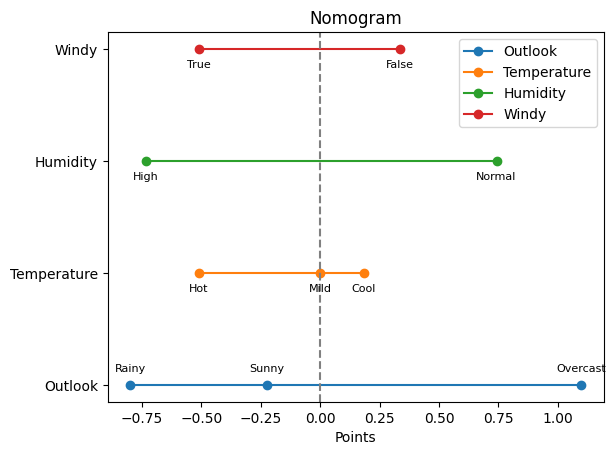

In [7]:
def plot_nomogram(points):
    fig, ax = plt.subplots()
    classes = ["Outlook", "Temperature", "Humidity", "Windy"]

    for i, current in enumerate(points):
        categories, values = zip(*current)
        # Sort values and categories
        sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
        sorted_values = [values[ix] for ix in sorted_indices]
        sorted_categories = [categories[ix] for ix in sorted_indices]

        ax.plot(sorted_values, [i] * len(current), marker="o", label=classes[i])

        for value, category in zip(sorted_values, sorted_categories):
            if i == 0:
                ax.text(value, i + 0.1, category, ha="center", va="bottom", fontsize=8)
            else:
                ax.text(value, i - 0.1, category, ha="center", va="top", fontsize=8)

    ax.set_yticks(range(len(points)))
    ax.set_yticklabels([class_curr for class_curr in classes])
    ax.set_xlabel("Points")
    ax.legend()

    ax.axvline(x=0, linestyle="--", color="gray", label="Vertical Line")

    plt.title("Nomogram")
    plt.show()


plot_nomogram(calculated_points)

In [8]:
def interactive_choice():
    def run_code(change):
        values = []
        values.append(dropdown1.value)
        values.append(dropdown2.value)
        values.append(dropdown3.value)
        values.append(dropdown4.value)

        sum_val = 0
        for value in values:
            for row in points:
                for pair in row:
                    if pair[0] == value:
                        sum_val += pair[1]
        odds = math.exp(sum_val)
        probability = odds / (1 + odds)

        print(
            "Glede ne pretekle dogodke bi danes šel igrat golf z verjetnosjo:",
            probability,
        )

    choices_windy = ["True", "False"]
    choices_humidity = ["High", "Normal"]
    choices_temperature = ["Hot", "Cool", "Mild"]
    choices_outlook = ["Sunny", "Overcast", "Rainy"]

    print("Ali naj grem danes igrat golf?")
    print("* Iz menijev izberite današnje pogoje")

    dropdown1 = widgets.Dropdown(options=choices_outlook, description="Vreme:")
    dropdown2 = widgets.Dropdown(
        options=choices_temperature, description="Temperatura:"
    )
    dropdown3 = widgets.Dropdown(options=choices_humidity, description="Vlažnost:")
    dropdown4 = widgets.Dropdown(options=choices_windy, description="Veter:")

    run_button = widgets.Button(description="Izvedite")

    run_button.on_click(run_code)

    display(dropdown1, dropdown2, dropdown3, dropdown4, run_button)

In [9]:
def full_function(num_rows=20):
    ucna_mnozica = generate_random(num_rows)
    dataframes, aprior = calculate_df(ucna_mnozica)
    print(aprior)
    calculated_points = []
    for df in dataframes:
        calculated_points.append(calculate_points(df))
    plot_nomogram(calculated_points)

    return calculated_points, aprior

(2, 5)


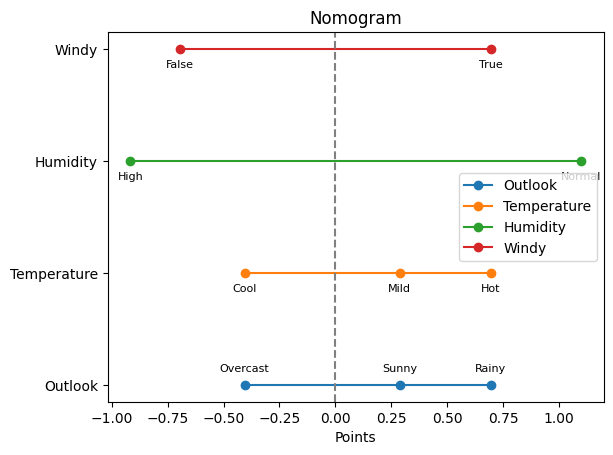

Button(description='Reset', style=ButtonStyle())

In [ ]:
points = None
aprior = None

number_input = FloatText(description="Vnesite:")
run_button2 = widgets.Button(description="Generiraj")
reset_button = widgets.Button(description="Reset")


def reset_widgets(number_input, run_button2):
    clear_output()
    display(number_input, run_button2)


def run_code1(change):
    global points
    global aprior
    print("run code 1")
    clear_output()
    points, aprior = full_function(int(number_input.value))
    display(reset_button)


def reset_widgets_wrapper(change):
    reset_widgets(number_input, run_button2)


def interactive_window():
    print("Vnesite število, da določite velikost učne množice:")
    print("1")
    run_button2.on_click(run_code1)
    print("2")
    reset_button.on_click(reset_widgets_wrapper)
    print("3")
    display(number_input, run_button2)
    print("4")

# Interaktivni del programa
* V spodnji okvir vnesemo število s katerim določimo velikost generirane učne množice
* Ob kliku na gumb **Generiraj** se zgenerira učna množica in izračunajo vse vrednosti ter izriše **nomogram**.
* S klikom na gumb **reset** lahko ponastavimo učno množico.
* V spodnjem izbirnem oknu določimo trenutne pogoje, nakar algoritem na podlagi teh izračuna verjetnost igranja golfa.

In [11]:
interactive_window()

Vnesite število, da določite velikost učne množice:
1
2
3


FloatText(value=0.0, description='Vnesite:')

Button(description='Generiraj', style=ButtonStyle())

4


In [12]:
interactive_choice()

Ali naj grem danes igrat golf?
* Iz menijev izberite današnje pogoje


Dropdown(description='Vreme:', options=('Sunny', 'Overcast', 'Rainy'), value='Sunny')

Dropdown(description='Temperatura:', options=('Hot', 'Cool', 'Mild'), value='Hot')

Dropdown(description='Vlažnost:', options=('High', 'Normal'), value='High')

Dropdown(description='Veter:', options=('True', 'False'), value='True')

Button(description='Izvedite', style=ButtonStyle())

Glede ne pretekle dogodke bi danes šel igrat golf z verjetnosjo: 0.6808510638297872
Glede ne pretekle dogodke bi danes šel igrat golf z verjetnosjo: 0.5161290322580646
Glede ne pretekle dogodke bi danes šel igrat golf z verjetnosjo: 0.41558441558441556
